In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
# see the value of multiple statements at once
# output for all commands in python jupyter notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [45]:
Titanictest = pd.read_csv('./Downloads/Titanictest.csv')
Titanictrain = pd.read_csv('./Downloads/Titanictrain.csv')

In [7]:
Titanictest.head()

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
Titanictrain.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data info

In [9]:
import os

In [10]:
list(os.walk(r'C:\Users\10c51\Logistic R'))

[]

In [13]:
test = pd.read_csv('./Downloads/Titanictest.csv')
train = pd.read_csv('./Downloads/Titanictrain.csv')

In [15]:
train.shape; test.shape

(891, 12)

(418, 11)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Gender         891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Gender         418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [19]:
train.describe(); test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [21]:
# checking for mising values

train.isna().sum(); test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Gender           0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Figure size 1440x720 with 0 Axes>

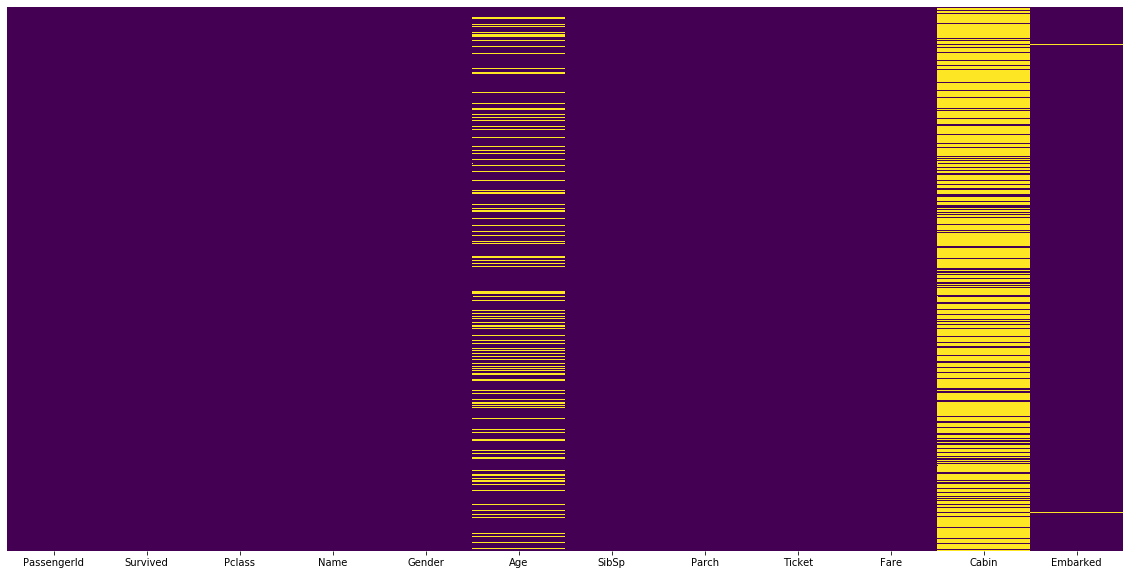

In [22]:
# check for missing values

plt.figure(figsize=(20,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

<Figure size 1440x720 with 0 Axes>

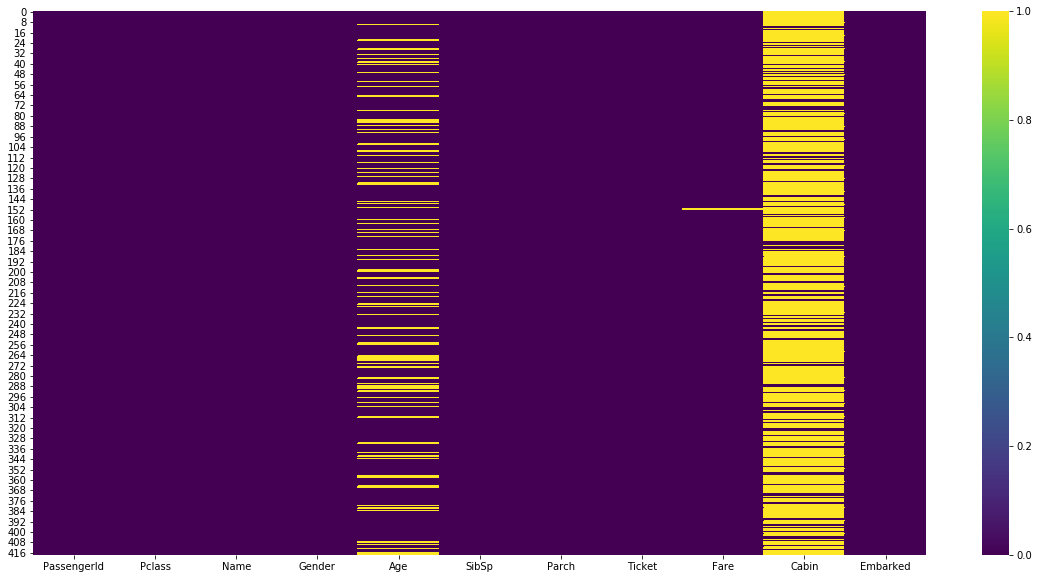

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(test.isnull(),cmap='viridis')
plt.show()

In [30]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Gender         891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [39]:
len(train)
((train.isna().sum()/len(train)*100).round(2)).astype(str)+ '%'

891

PassengerId      0.0%
Survived         0.0%
Pclass           0.0%
Name             0.0%
Gender           0.0%
Age            19.87%
SibSp            0.0%
Parch            0.0%
Ticket           0.0%
Fare             0.0%
Cabin           77.1%
Embarked        0.22%
dtype: object

In [41]:
survive = train.Survived.value_counts()
survive

0    549
1    342
Name: Survived, dtype: int64

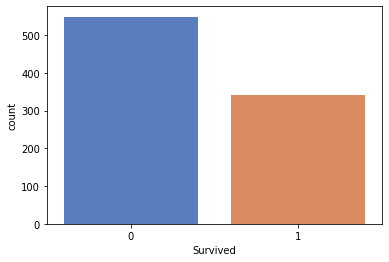

In [42]:
# use count plot to visulize the count by category
# fo detaile about palette find in https://seaborn.pydata.org/tutorial/color_palettes.html

sns.countplot(x='Survived',data=train,palette='muted');

In [ ]:
# After this section buld a pychart hear

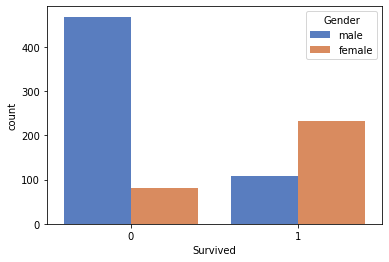

In [43]:
sns.countplot(x='Survived',data=train,palette='muted',hue='Gender');

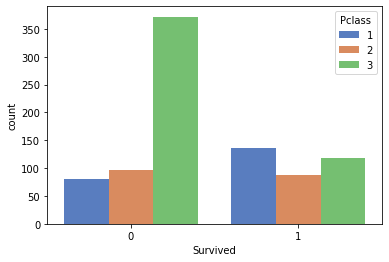

In [44]:
sns.countplot(x='Survived',data=train,palette='muted',hue='Pclass');

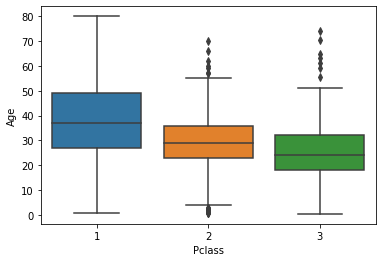

In [46]:
sns.boxplot(y='Age',x='Pclass',data=train)

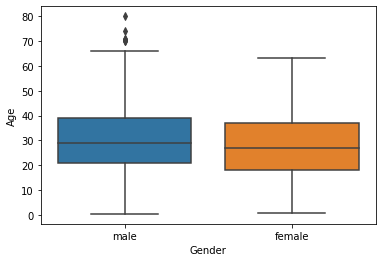

In [47]:
sns.boxplot(x='Gender',y='Age',data=train)

In [63]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [48]:
# replace or fill missing Age values by pclass

train['Age'] = train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'))

In [49]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [50]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [51]:
#Drop the 2 rows having NA in Embarked
train.dropna(inplace=True)

<Figure size 1080x720 with 0 Axes>

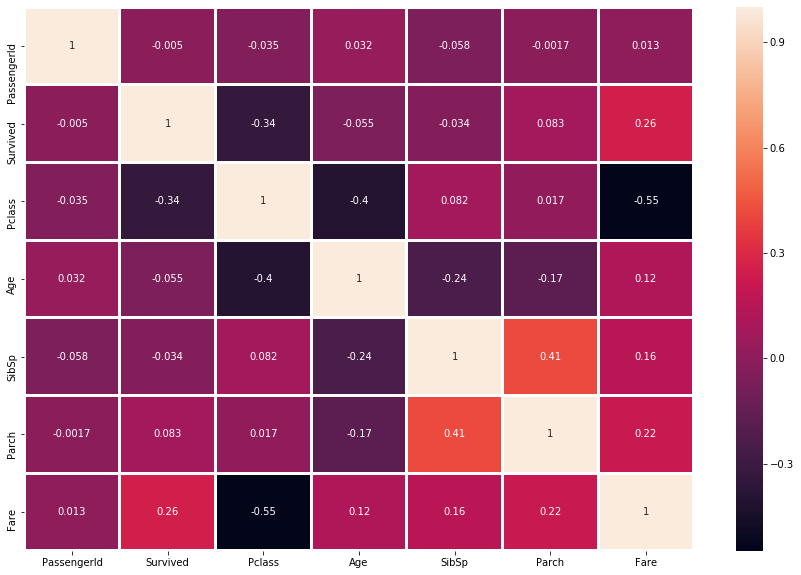

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True, linewidths=2)

In [53]:
# converting categorical feature one_hot encoding

pd.get_dummies(train['Gender']).head(10)

pd.get_dummies(train['Gender'],drop_first=True).head(10)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [54]:
train.drop(['Gender','Embarked','Name','Ticket'],axis=1,inplace=True)


In [55]:
Gender = pd.get_dummies(train['Gender'],prefix='Gender',drop_first=True)

KeyError: 'Gender'

In [ ]:
Fature_cols = ['PassengerId','Pclass','Age','SibSp','Parch','Fare']
x = train[Fature_cols]
y = train['Survived']